In [1]:
import pickle
from optiwindnet.api import WindFarmNetwork, EWRouter, HGSRouter, MILPRouter, load_repository

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
locations = load_repository()

# Define sites to process
sites = {
    "eagle": locations.eagle,
    "taylor": locations.taylor_2023,
}

# Define routers to apply with their specific cable settings
routers = {
    "EWRouter": {
        "router": None,
        "cables": 7 #[(5, 100), (7, 200), (9, 300)]
    },
    "EWRouter_straight": {
        "router": EWRouter(feeder_route='straight'),
        "cables": 7
    },
    "HGSRouter": {
        "router": HGSRouter(time_limit=2),
        "cables": 7
    },
    "HGSRouter_feeder_limit": {
        "router": HGSRouter(time_limit=2, feeder_limit=0),
        "cables": 7
    },
    "MILPRouter": {
        "router": MILPRouter(solver_name='ortools', time_limit=10, mip_gap=0.005),
        "cables": 2
    },
}

graphs = {}

for site_name, location in sites.items():
    for router_name, config in routers.items():
        cables = config["cables"]
        router = config["router"]

        wfn = WindFarmNetwork(L=location, cables=cables)
        wfn.optimize(router=router)

        key = f"{site_name}_{router_name}"
        graphs[key] = wfn.G

# Save all graphs to a single pickle file
with open("G_tests.pkl", "wb") as f:
    pickle.dump(graphs, f)


Vehicle number (0) too low for feasibilty with capacity (7). Setting to 8.


<Axes: >

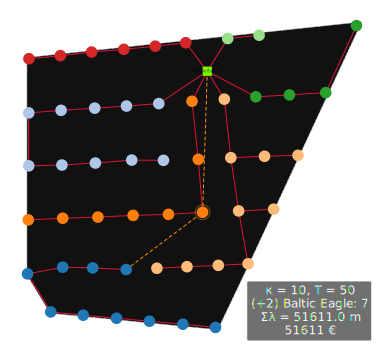

In [4]:
from optiwindnet.api import WindFarmNetwork, EWRouter, HGSRouter, MILPRouter, load_repository
locations = load_repository()
router = MILPRouter(solver_name='ortools', time_limit=20, mip_gap=0.05)
wfn = WindFarmNetwork(L=locations.eagle, cables=10)
wfn.optimize()

L = wfn.L
L.nodes[10]['power'] = 2
L.nodes[10]['label'] = 'A'
#print(L.nodes[10].get('power', 1))
wfn.plot(node_tag='label')
